# Car Prices

🎯 This exercise consists of the data preparation and feature selection techniques you have learnt today to a new dataset.

👇 Download the `ML_Cars_dataset.csv` [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv) and place it in the `data` folder.  Load into this notebook as a pandas dataframe named `df`, and display its first 5 rows.

In [43]:
# YOUR CODE HERE
import pandas as pd
df=pd.read_csv("data/ML_Cars_dataset.csv")
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


In [44]:
df.shape

(205, 9)

In [45]:
df.duplicated().sum()

14

ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to use refer to it through the exercise.

# Duplicates

👇 Remove the duplicates from the dataset if there are any. Overwite the dataframe `df`.

In [46]:
# YOUR CODE HERE

df.duplicated().sum()
df=df.drop_duplicates()
df

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


In [47]:
df.shape

(191, 9)

# Missing values

👇 Locate missing values, investigate them, and apply the solutions below accordingly:

- Impute with most frequent
- Impute with median

Make changes effective in the dataset `df`.

In [48]:
# YOUR CODE HERE
df.isnull().sum()

aspiration         0
enginelocation    10
carwidth           2
curbweight         0
enginetype         0
cylindernumber     0
stroke             0
peakrpm            0
price              0
dtype: int64

In [49]:
df.isnull().sum().sort_values(ascending=False)/len(df)

enginelocation    0.052356
carwidth          0.010471
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

## `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations of missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since there is less than 30% of missing values.
</details> 

In [50]:
# YOUR CODE HERE
df.drop(columns="carwidth")

,aspiration,enginelocation,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,2548,dohc,four,2.68,5000,expensive
2,std,front,2823,ohcv,six,3.47,5000,expensive
3,std,front,2337,ohc,four,3.40,5500,expensive
4,std,front,2824,ohc,five,3.40,5500,expensive
5,std,front,2507,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...
200,std,front,2952,ohc,four,3.15,5400,expensive
201,turbo,front,3049,ohc,four,3.15,5300,expensive
202,std,front,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,3217,ohc,six,3.40,4800,expensive


## `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is front, impute with the most frequent.
</details>

In [65]:
# YOUR CODE HERE
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["enginelocation"])
le.transform(df["enginelocation"])
le_array=le.transform(df["enginelocation"])
df["enginelocation"]=le_array

### ☑️ Test your code

In [62]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /Users/shu/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shu/Desktop/Lewagon/code/shiro101010101/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth FAILED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

=================================== FAILURES ===================================
_______________________ TestMissing_values.test_carwidth _______________________

self = <tests.test_missing_values.TestMissing_values testMethod=test_carwidth>

    def test_carwidth(self):
>       self.assertEqual(self.result.dataset.carwidth.isnull().sum(), 0)
E       AssertionError: 2 != 0

tests/test_missing_values.py:7: AssertionError
=

# Scaling

👇 Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scale
- Standard Scale

Replace the original columns by the transformed values.

## `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

<AxesSubplot:ylabel='Frequency'>

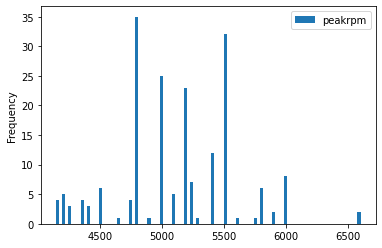

In [81]:
# YOUR CODE HERE
df[["peakrpm"]].plot.hist(bins=100)

In [71]:
# YOUR CODE HERE

## `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [0]:
# YOUR CODE HERE

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

# Encoding

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features by their encoded version(s).

## `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [0]:
# YOUR CODE HERE

## `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [0]:
# YOUR CODE HERE

## `cylindernumber`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded.
</details>

In [0]:
# YOUR CODE HERE

## `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

# Collinearity

👇 Perform a collinearity investigation on the dataset and remove unecessary features. Make changes effective in the dataframe `df`.

In [0]:
# YOUR CODE HERE

ℹ️ Out of the highly correlated feature pairs, remove the one with less granularity.

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('collinearity',
                         dataset = df)
result.write()
print(result.check())

# Base Modelling

👇 Cross validate a Logistic regression model. Save its score under variable name `base_model_score`.

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

# Feature Selection

👇 Perform feature permutation to remove the weak features from the feature set. With that strong feature set, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [0]:
# YOUR CODE HERE

### ☑️ Test your code

In [0]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

# 🏁